In [ ]:
!pip install networkx==2.5 
!pip install matplotlib==3.2.2 
!pip install pandas==1.1.3 
!pip install scipy==1.6.2 

In [3]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

# Chapter 1.2: Graph properties

### Integration metrics
These measure how nodes tend to be interconnected with each 
other.

Distance, path, and shortest path

Characteristic path length

Global and local efficiency

###  Segregation metrics
These quantify the presence of groups of interconnected nodes, known as communities or modules, within a network.

Clustering coefficient

Transitivity

Modularity

### Centrality metrics 
These assess the importance of individual nodes inside a network.

Degree centrality

Closeness centrality

Betweenness centrality

### Resilience metrics 
These can be thought of as a measure of how much a network is able to maintain and adapt its operational performance when facing failures or 
other adverse conditions.

(Assortativity coefficient)

## Investigating some of these properties


**distance**: The concept of distance in a graph is often related to the number of edges to traverse in 
order to reach a target node from a given source node. 

**path**: The set of edges connecting node to node is called a path.

**shortest path**: A shortest path between a source node and a target node is the path having the lowest number of edges compared 
to all the possible paths between $i$ and $j$ . 

**diameter**: The diameter of a network is the number of edges contained in the longest shortest path among all possible shortest paths.

In [2]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

### Shortest path



In [3]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])


### Example: 
There are different paths to reach Tokyo from Dublin. However, one of them is the shortest (the edges on the shortest path are 
highlighted):

In [4]:
path = nx.shortest_path(G,source=1,target=7)
print(path)

[1, 3, 4, 5, 7]


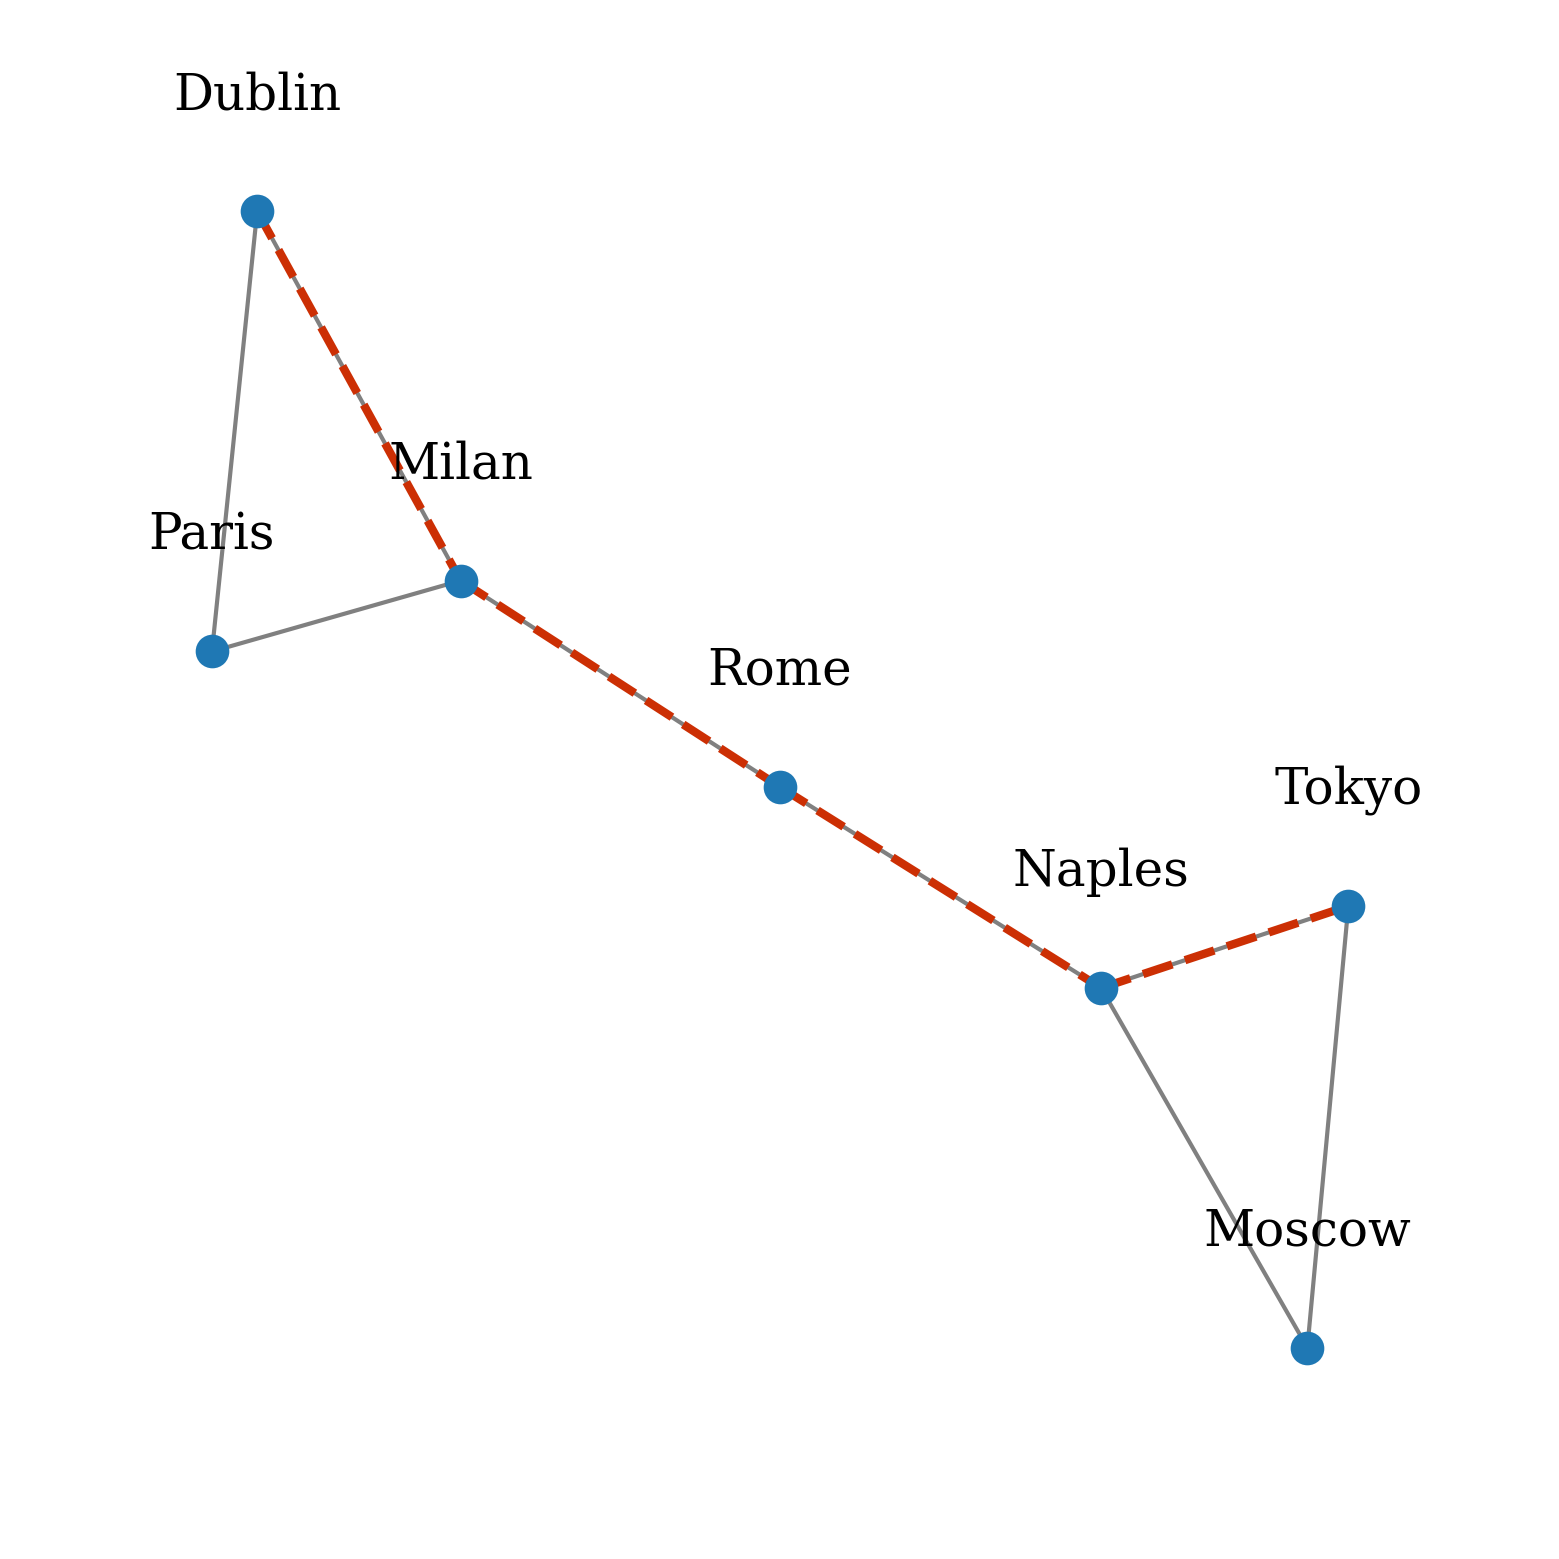

In [5]:
draw_enhanced_path(G, path, node_names=nodes,filename='shortest_path.png')

### Characteristic path lenght

The characteristic path length is defined as the average of all the shortest path lengths 
between all possible pair of nodes. If $l_i$ is the average path length between the node $i$ and 
all the other nodes, the characteristic path length is computed as follows:

$$\displaystyle \frac{1}{q(q-1)} \sum_{i \in V} l_i$$

Here, $V$ is the set of nodes in the graph and $q=|V|$ represents its order. 

This is one of the most commonly used measures of how efficiently information is spread across a network. 

Networks having shorter characteristic path lengths promote the quick transfer of information and reduce costs.


In [6]:
nx.average_shortest_path_length(G)

2.1904761904761907

### Efficiency

**Global efficiency** is the average of the inverse shortest path length for all pairs of nodes. 
Such a metric can be seen as a measure of how efficiently information is exchanged 
across a network. 

Consider that $l_{ij}$ is the shortest path between a node and a node . The 
network efficiency is defined as follows:

$$
\displaystyle \frac{1}{q(q - 1)} \sum_{\substack{i,j \in V}} \frac{1}{l_i}
$$

Efficiency is at a maximum when a graph is fully connected, while it is minimal for 
completely disconnected graphs. Intuitively, the shorter the path, the lower the measure.

Global Efficiency indicates how quickly or directly information can be transmitted across the entire network.
Unlike Characteristic Path Length, which focuses on the distances between nodes, this metric emphasizes the speed and efficiency of information transfer.

The **local efficiency** of a node can be computed by considering only the neighborhood 
of the node in the calculation, without the node itself.

In [7]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

print(nx.global_efficiency(G))
print(nx.local_efficiency(G))

0.611111111111111
0.6666666666666667


### Another example
In the following, two examples of graphs are depicted. As observed, a fully 
connected graph on the left presents a higher level of efficiency compared to a circular 
graph on the right. 

In a fully connected graph, each node can be reached from any other 
node in the graph, and information is exchanged rapidly across the network. However, 
in a circular graph, several nodes should instead be traversed to reach the target node, 
making it less efficient:

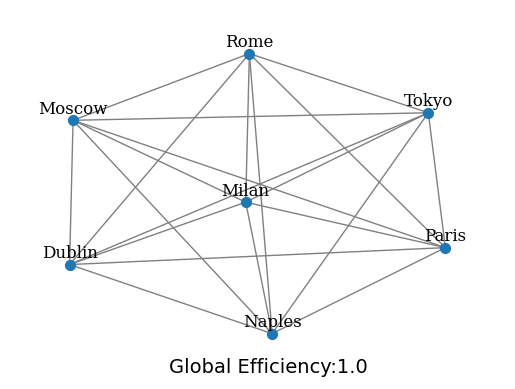

In [8]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

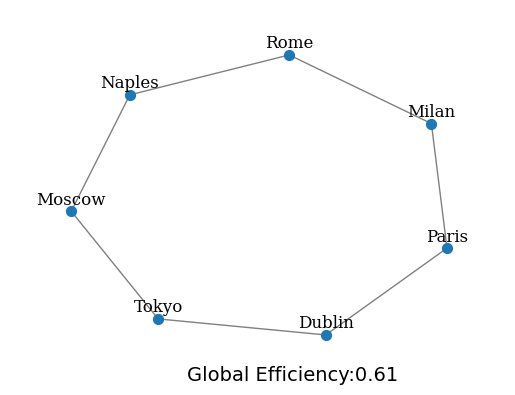

In [9]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

### Clustering coefficient

The clustering coefficient is a measure of how much nodes cluster together. It is defined 
as the fraction of triangles (complete subgraph of three nodes and three edges) around 
a node and is equivalent to the fraction of the node's neighbors that are neighbors of 
each other.

For a **node's clustering coefficient**:

$
C_v = \frac{\text{Number of triangles involving } v}{\frac{k(k - 1)}{2}}
$

For the **global clustering coefficient** (for the entire graph), the formula is often computed as the average clustering coefficient of all nodes:

$
C_{\text{global}} = \frac{1}{|V|} \sum_{v \in V} C_v
$

In summary:
- $C_v = 1 $: Complete clustering among the neighbors
- $ C_v = 0 $: No clustering among the neighbors
- $ 0 < C_v < 1 $: Partial clustering among the neighbors

In [10]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [11]:
nx.average_clustering(G)

0.6666666666666667

The **local clustering coefficient** is computed in networkx using the following command. The output is a Python dictionary containing, for each node (identified by the respective 
key), the corresponding value

In [12]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

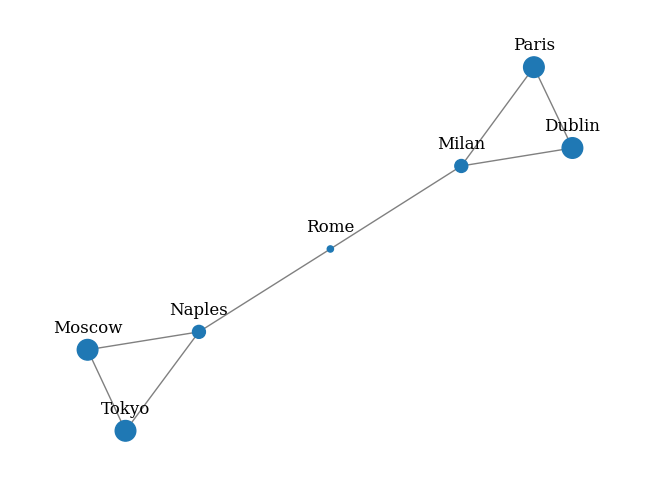

In [13]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

### Centrality
Segregation metrics help to understand the presence of groups. However, each node in a 
graph has its own importance. To quantify it, we can use centrality metrics.

One of the most common and simple centrality metrics is the **degree centrality** metric. 
This is directly connected with the degree of a node, measuring the number of incident
edges on a certain node $i$. 
Intuitively, the more a node is connected to an other node, the more its degree centrality 
will assume high values. Note that, if a graph is directed, the **in-degree centrality** and 
**out-degree centrality** will be considered for each node, related to the number of incoming
and outcoming edges, respectively. Degree centrality is computed in networkx by using 
the following command:

In [14]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [15]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


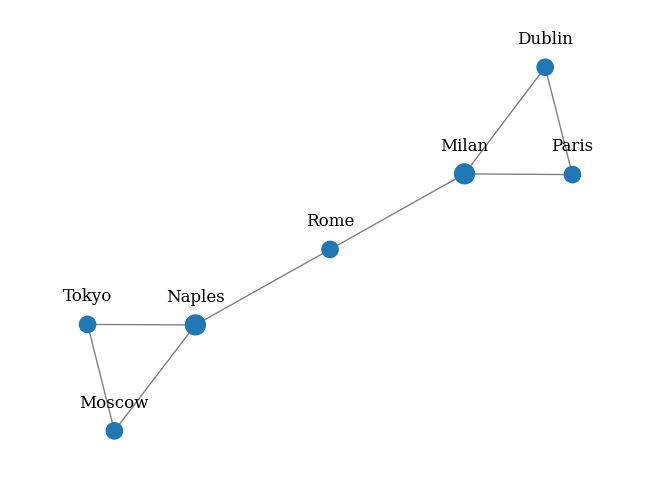

In [16]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

### Closeness centrality
The closeness centrality metric attempts to quantify how much a node is close (well connected) to other nodes. More formally, it refers to the average distance of a node to all other nodes in the network. If $l_{ij}$ is the shortest path between node $i$ and node $j$, the 
closeness centrality is defined as follows:

$$
\displaystyle \frac{1}{\sum_{\substack{i,j \in V \\ i \ne j}}l_i}
$$
Here, V is the set of nodes in the graph.


In [17]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


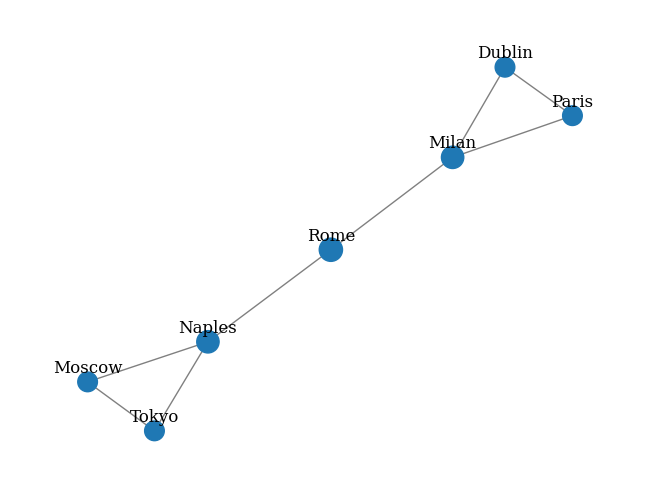

In [18]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

### Betweenness centrality
The betweenness centrality metric evaluates how much a node acts as a **bridge** between 
other nodes. Even if poorly connected, a node can be strategically connected, helping to 
keep the whole network connected.

If $L_{wj}$ is the total number of shortest paths between node $w$ and node $j$ and $L_{wj}(i)$ is 
the total number of shortest paths between $w$ and $j$ passing through node $i$, then the 
betweenness centrality is defined as follows:

$$ \sum_{i \ne j \ne w}\frac{L_{wj}(i)}{L_{wj}}
$$

In [19]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


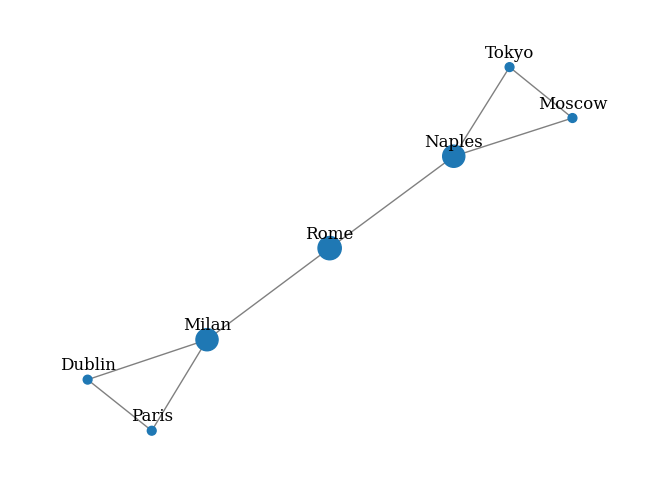

In [20]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

Milan and Naples have the highest degree centrality. 

Rome has the highest closeness centrality since it is the closest to any other node. 
It also shows the highest betweenness centrality because of its crucial role in connecting the two visible 
clusters and keeping the whole network connected. 

### Assortativity

Assortativity measures how likely it is that nodes in a network connect to other nodes that are similar to them. There are different ways to calculate this similarity, but one of the most common is using the Pearson correlation coefficient. This method looks at the degrees (number of connections) of two nodes that are directly connected by a link.

- If the Pearson coefficient is **positive**, it means that nodes tend to connect to others with a **similar degree** (e.g., high-degree nodes connecting to other high-degree nodes).

- If the coefficient is **negative**, it means that nodes tend to connect to others with a **different degree** (e.g., high-degree nodes connecting to low-degree nodes).

Assortativity using the Pearson  correlation coefficient is computed in networkx by using the following 
command:

In [21]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

## Assortativity and Influencers in Social Networks
Most social networks are assortative—nodes with similar connectivity levels tend to connect with each other. Highly connected users often engage with other highly connected users, while those with fewer connections interact with similar peers.

However, influencers like celebrities or bloggers disrupt this pattern. They receive many connections from low-degree users while also forming dense links with other influencers.

This mixed pattern—many ties from low-degree to high-degree nodes, plus strong interconnections among high-degree nodes—introduces disassortativity into the network, reflecting the complex and hierarchical nature of real-world social systems.

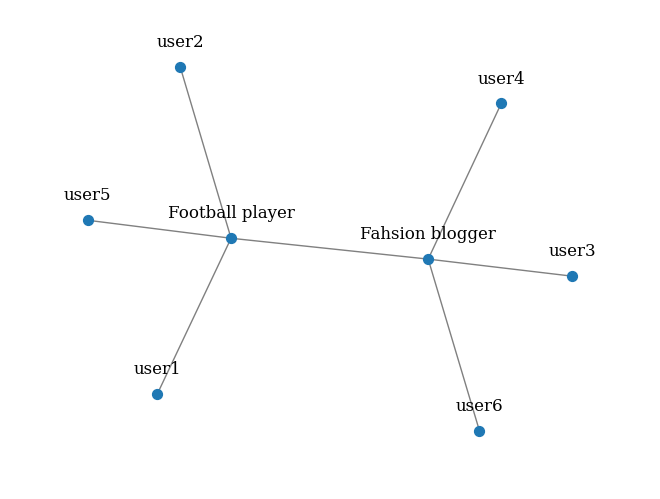

In [22]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [23]:
nx.degree_pearson_correlation_coefficient(G)

-0.7500000000000001

### Modularity

Modularity measures how well a network is divided into communities—groups of nodes with dense internal connections and few links between groups.

For example, in a social network like Reddit, users in a gaming community interact mostly with each other and less with users in unrelated communities, like fashion.
Unlike many other metrics, modularity is usually calculated using optimization algorithms.

In [4]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875


### Transitivity

Transitivity is a global form of the clustering coefficient. It measures how often connected triples of nodes form triangles.

A triplet is any group of three nodes:

Open triplet: Two edges form a path of three nodes.

Closed triplet: All three nodes are connected (a triangle).

- High transitivity ($~1$) means nodes often form triangles—indicating strong clustering and community structure.
- Low transitivity ($~0$) means few triangles—suggesting weak or sparse connections in the network.

In [5]:
nx.transitivity(G)

0.5454545454545454

-------------------------------

All implemented algorithms in networkx:

https://networkx.org/documentation/stable/reference/algorithms/
